# Simulating a standard normal distribution

We are asked to simulate a normal distribution using a bernoulli distribution. We can achieve this by carrying out the following experiment. First, we simulate a binomial by sampling from the bernoulli $n$ times. For a large number of trials $n$, the normal distribution is roughly equivalent to a binomial. More mathematically, for a large $n$, $\text{Binomial}(n, p) \approx \mathcal{N}\big(np, np(1-p)\big)$.  To get a more accurate simulation, we can increase the number of trials $n$. This is however computationally expensive. Thus, as $n \to \infty$, drawing a sample from $\text{Binomial}(n, p)$ is equivalent to drawing a sample from $\mathcal{N}\big(np, np(1-p)\big)$. Now since we are asked to sample from a standard normal (which is defined as $\mathcal{N}(0, 1)$), we have to transform a sample $x \sim \mathcal{N}\big(np, np(1-p)\big)$ to the standard normal. This can be done calculating the $z-$scores. We calculate the $z-$score of $x \sim \mathcal{N}\big(np, np(1-p)\big)$ which is given by $z_x = \dfrac{x - np}{\sqrt{np(1-p)}}$. Now we can use the $z-$score to transform it to a sample from the standard normal $z_x = \dfrac{x - 0}{1} = z_x.$ 

Thus, the final procedure is:


1. Draw a sample from $x \sim \text{Binomial}(n, p) \approx \mathcal{N}\big( np, np(1-p) \big) $

2. Return $\dfrac{x - np}{\sqrt{np(1-p)}}$

In [5]:
from common import bernoulli
import matplotlib.pyplot as plt
from pylab import rcParams
import math
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")



def binomial(n: int, p: float = 0.5) -> int:
    """
    :param n: Performs a bernoulli experiment `n` number of times
    :param p: probability of success for each bernoulli
    :return: # of successes in `n`
    """
    return sum([bernoulli(p) for _ in range(n)])


def standard_normal(n: int = 10000):
    p = 0.5  # probability of success of the bernoulli trial.
    sample = binomial(n, p)
    mean, std_dev = n * p, math.sqrt(n * p * (1 - p))
    return (sample - mean) / std_dev


In [6]:
num_experiments = 10000
samples = [standard_normal() for _ in range(num_experiments)]

(array([   9.,   77.,  519., 1609., 2757., 2792., 1628.,  521.,   74.,
          14.]),
 array([-3.9  , -3.122, -2.344, -1.566, -0.788, -0.01 ,  0.768,  1.546,
         2.324,  3.102,  3.88 ]),
 <a list of 10 Patch objects>)

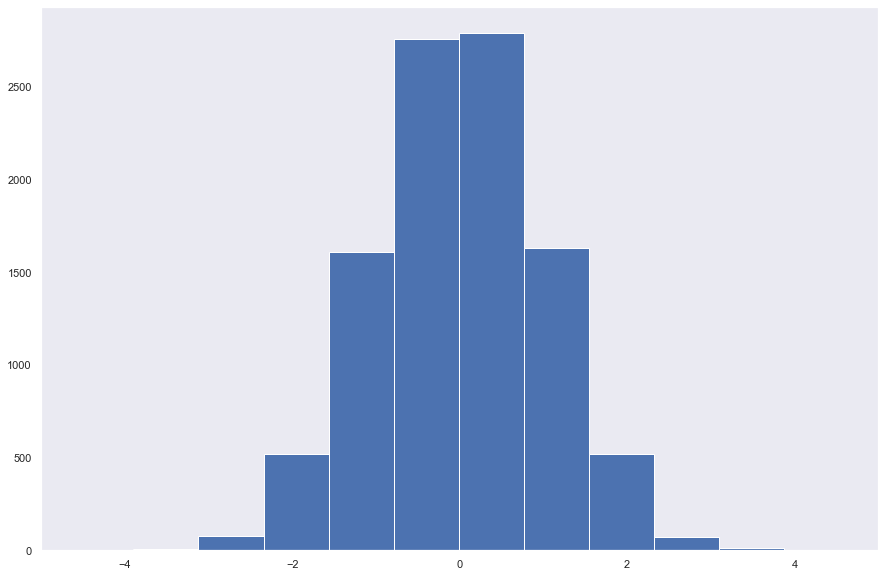

In [7]:
rcParams['figure.figsize'] = 15, 10
plt.xlim(-5, 5)
plt.grid()
plt.hist(samples)